In [1]:
%load_ext autoreload
%autoreload 2

# Init

In [2]:
import json
import sys
import re
import pickle as pkl
from pathlib import Path
from pprint import pprint
from collections import defaultdict
sys.path.append("../src")

import pandas as pd
from matplotlib import pyplot as plt
from joblib import Parallel, delayed

import constants
from eval import chart
from gen.util import read_data, write_jsonl

In [3]:
da_root = Path("/users/k21190024/study/fact-checking-repos/fever/baseline/thesis/models/decomposable-attention")

da_acc_fever = da_root / "fever-da-adagrad-hp_tune"
da_acc_cfever = da_root / "climatefever-da-adagrad-hp_tune"
da_acc_c_fever = da_root / "fever-climatefever-da-adagrad-hp_tune"

# Hyperparameter tuning

In [45]:
def augment_metric(met):
    met["bias_variance"] = met["validation_loss"] - met["training_loss"]
    met["acc_diff"] = met["training_accuracy"] - met["validation_accuracy"]
    met["macro_fscore_diff"] = met["training_macro_fscore"] - met["validation_macro_fscore"]
    
    min_val_loss = fmet.nsmallest(5, columns="validation_loss", keep="first")[["epoch", "validation_loss", "bias_variance"]]
    min_val_loss["metric"] = "validation_loss"
    max_acc = fmet.nlargest(5, columns="validation_accuracy", keep="first")[["epoch", "validation_accuracy", "bias_variance"]]
    max_acc["metric"] = "validation_accuracy"
    max_f1 = fmet.nsmallest(5, columns="validation_macro_fscore", keep="first")[["epoch", "validation_macro_fscore", "bias_variance"]]
    max_f1["metric"] = "validation_macro_fscore"
    
    return pd.concat([min_val_loss, max_acc, max_f1], axis=0)

## FEVER

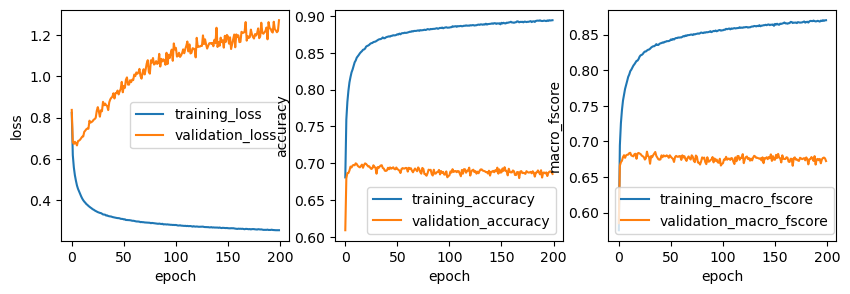

In [46]:
ax, fmet = chart.plot_finetune(da_acc_fever, return_metric=True)
fminmax = augment_metric(fmet)

In [47]:
fminmax

,epoch,validation_loss,bias_variance,metric,validation_accuracy,validation_macro_fscore
42,5,0.666087,0.193966,validation_loss,NaN,NaN
109,2,0.673188,0.113788,validation_loss,NaN,NaN
188,4,0.676194,0.180992,validation_loss,NaN,NaN
73,1,0.681508,0.062510,validation_loss,NaN,NaN
35,3,0.683598,0.161752,validation_loss,NaN,NaN
11,10,NaN,0.298767,validation_accuracy,0.69997,NaN
72,19,NaN,0.416831,validation_accuracy,0.69987,NaN
86,20,NaN,0.425214,validation_accuracy,0.69907,NaN
131,11,NaN,0.308129,validation_accuracy,0.69887,NaN
159,16,NaN,0.372895,validation_accuracy,0.69817,NaN


In [56]:
fmet.loc[fmet["epoch"] == fmet["best_epoch"].max(), ["epoch", "validation_loss", "validation_accuracy", "validation_macro_fscore"]]

,epoch,validation_loss,validation_accuracy,validation_macro_fscore
65,27,0.80485,0.69727,0.685576


## Climate-FEVER

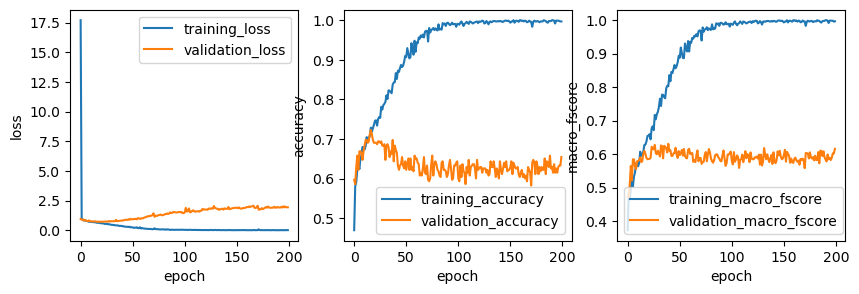

In [57]:
ax, fmet = chart.plot_finetune(da_acc_cfever, return_metric=True)
fminmax = augment_metric(fmet)

In [58]:
fminmax

,epoch,validation_loss,bias_variance,metric,validation_accuracy,validation_macro_fscore
72,19,0.713077,0.115892,validation_loss,NaN,NaN
163,21,0.714204,0.141561,validation_loss,NaN,NaN
86,20,0.718049,0.128527,validation_loss,NaN,NaN
63,22,0.719139,0.139107,validation_loss,NaN,NaN
85,17,0.721484,0.082988,validation_loss,NaN,NaN
159,16,NaN,0.093640,validation_accuracy,0.723022,NaN
77,15,NaN,0.077259,validation_accuracy,0.712230,NaN
85,17,NaN,0.082988,validation_accuracy,0.712230,NaN
131,11,NaN,0.049752,validation_accuracy,0.697842,NaN
175,12,NaN,0.042154,validation_accuracy,0.697842,NaN


In [59]:
fmet.loc[fmet["epoch"] == fmet["best_epoch"].max(), ["epoch", "validation_loss", "validation_accuracy", "validation_macro_fscore"]]

,epoch,validation_loss,validation_accuracy,validation_macro_fscore
8,39,0.80311,0.683453,0.631107


## FEVER + Climate-FEVER

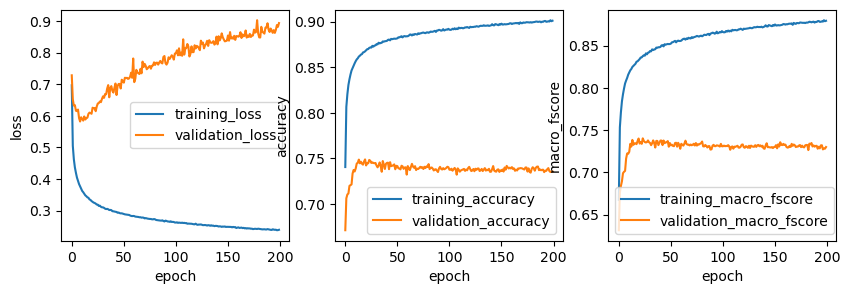

In [60]:
ax, fmet = chart.plot_finetune(da_acc_c_fever, return_metric=True)
fminmax = augment_metric(fmet)

In [61]:
fminmax

,epoch,validation_loss,bias_variance,metric,validation_accuracy,validation_macro_fscore
141,8,0.581785,0.205135,validation_loss,NaN,NaN
131,11,0.584704,0.226723,validation_loss,NaN,NaN
36,13,0.588095,0.240062,validation_loss,NaN,NaN
11,10,0.590051,0.228007,validation_loss,NaN,NaN
196,14,0.592514,0.247269,validation_loss,NaN,NaN
72,19,NaN,0.276443,validation_accuracy,0.748857,NaN
36,13,NaN,0.240062,validation_accuracy,0.748662,NaN
94,23,NaN,0.292757,validation_accuracy,0.748273,NaN
128,24,NaN,0.310663,validation_accuracy,0.747397,NaN
116,36,NaN,0.357161,validation_accuracy,0.747105,NaN


In [62]:
fmet.loc[fmet["epoch"] == fmet["best_epoch"].max(), ["epoch", "validation_loss", "validation_accuracy", "validation_macro_fscore"]]

,epoch,validation_loss,validation_accuracy,validation_macro_fscore
94,23,0.614478,0.748273,0.74029
